In [1]:
import torchvision.transforms.functional as F
import matplotlib.pyplot as plt

def show(img):
    plt.imshow(F.to_pil_image(img))
    plt.xticks([])
    plt.yticks([])

In [2]:
from transform import make_simclr_transforms
from torchvision.datasets import CIFAR10
from torchvision.transforms import ToTensor

multiple_transform = make_simclr_transforms(0.5, 0.0, 32)

cifar_ds = CIFAR10(root='../datasets/', transform=ToTensor())

In [3]:
n = 100
sample = cifar_ds[n][0]

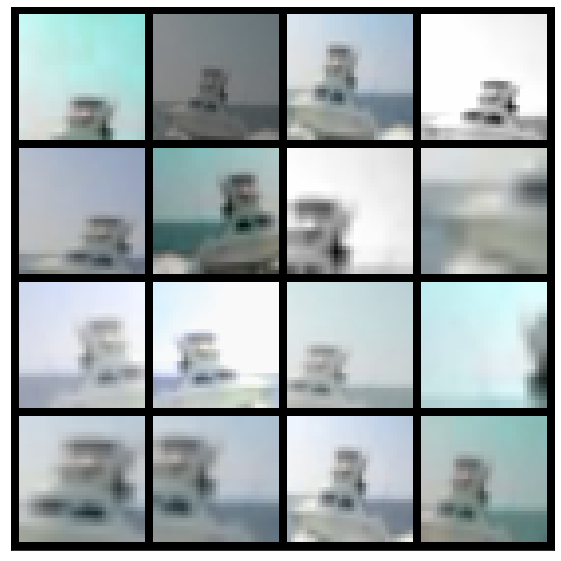

In [4]:
from torchvision.utils import make_grid

imglist = [multiple_transform(sample) for _ in range(16)]
grid = make_grid(imglist, nrow=4)

plt.figure(figsize=(10, 10))
show(grid)

# Test predictive loss

In [5]:
img1 = multiple_transform(sample)
img2 = multiple_transform(sample)

In [6]:
from lpl import LPLPass
import torch

layer = LPLPass()

# on same image
out1 = layer(img1)
out2 = layer(img1)
assert torch.equal(out1, out2)
assert torch.equal(img1, out1)
assert layer.predictive_loss().item() == 0.



In [7]:
layer = LPLPass()

out1 = layer(img1)
out2 = layer(img2)
layer.predictive_loss()

tensor(112.7562)